,week,facebook_spend,google_spend,tiktok_spend,instagram_spend,snapchat_spend,social_followers,average_price,promotions,emails_send,sms_send,revenue
0,2023-09-17,6030.80,3130.14,2993.22,1841.08,2204.72,0,101.95,0,102684,20098,83124.16
1,2023-09-24,5241.44,2704.00,0.00,0.00,0.00,0,103.86,0,96573,29920,373.02
2,2023-10-01,5893.00,0.00,0.00,0.00,0.00,0,100.38,0,96797,22304,513.01
3,2023-10-08,7167.16,0.00,0.00,0.00,0.00,0,103.14,1,99098,14171,452.78
4,2023-10-15,5360.29,0.00,0.00,3237.15,0.00,0,107.76,1,120754,30207,41441.95


Index(['week', 'facebook_spend', 'google_spend', 'tiktok_spend',
       'instagram_spend', 'snapchat_spend', 'social_followers',
       'average_price', 'promotions', 'emails_send', 'sms_send', 'revenue'],
      dtype='object')
Best alpha: 25.595479226995334
Coefficients: {'facebook_spend_log': np.float64(-2291.3936711220367), 'google_spend_log': np.float64(-5560.315694976872), 'tiktok_spend_log': np.float64(-4191.370793446848), 'instagram_spend_log': np.float64(53172.58542326769), 'snapchat_spend_log': np.float64(5169.393919464618), 'social_followers': np.float64(24.9541789629943), 'average_price': np.float64(-27198.769694204253), 'promotions': np.float64(1106.6521281952032), 'emails_send': np.float64(4876.192442066983), 'sms_send': np.float64(16387.194984305374)}


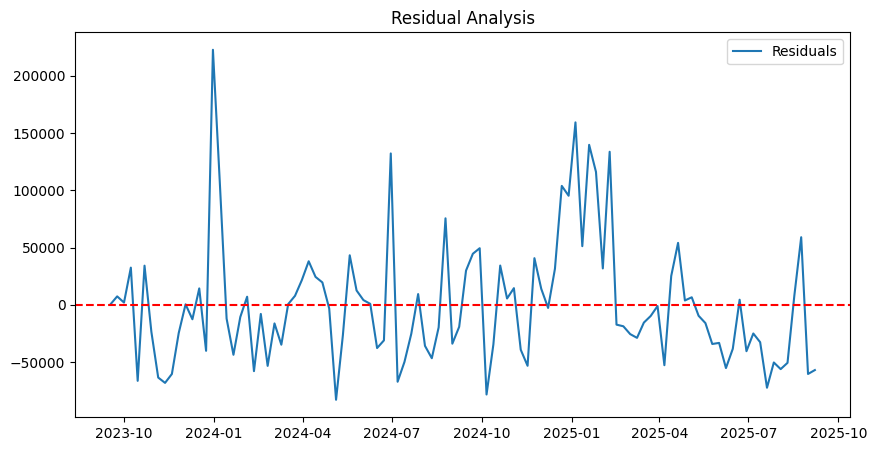

CV R^2 scores: [-20.46017397   0.37628814   0.35810475   0.6746212   -0.47552728]
Mean R^2: -3.905337433301092


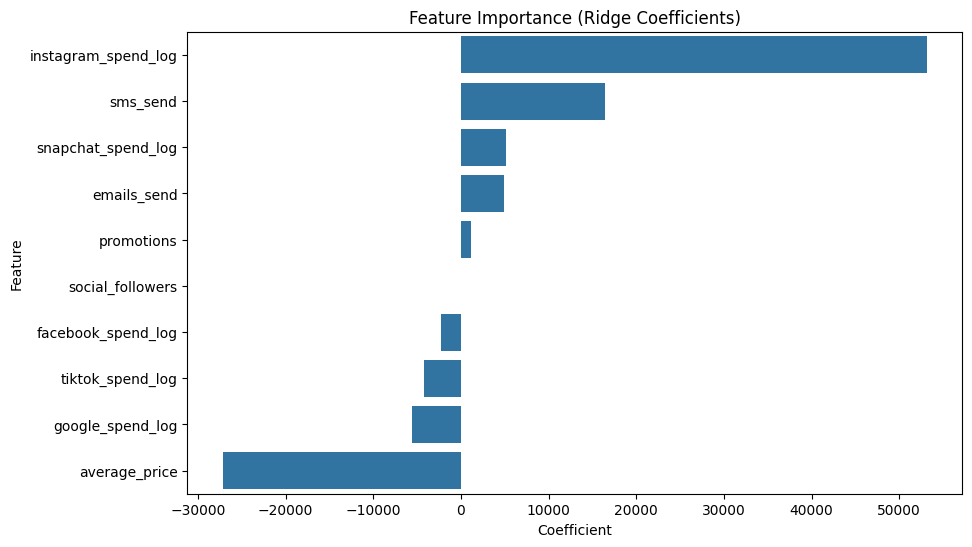

,Feature,Coefficient
3,instagram_spend_log,53172.585423
9,sms_send,16387.194984
4,snapchat_spend_log,5169.393919
8,emails_send,4876.192442
7,promotions,1106.652128
5,social_followers,24.954179
0,facebook_spend_log,-2291.393671
2,tiktok_spend_log,-4191.370793
1,google_spend_log,-5560.315695
6,average_price,-27198.769694


In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import RidgeCV
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import TimeSeriesSplit, cross_val_score


data = pd.read_csv("MMM Weekly.csv")
display(data.head())
print(data.columns)

data['week'] = pd.to_datetime(data['week'])
spend_cols = [
    'facebook_spend','google_spend','tiktok_spend',
    'instagram_spend','snapchat_spend'
]

for col in spend_cols:
    data[col + '_log'] = np.log1p(data[col])

features = [
    'facebook_spend_log','google_spend_log','tiktok_spend_log',
    'instagram_spend_log','snapchat_spend_log',
    'social_followers','average_price','promotions',
    'emails_send','sms_send'
]

X = data[features]
y = data['revenue']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
tscv = TimeSeriesSplit(n_splits=5)


alphas = np.logspace(-3, 3, 50)
model = RidgeCV(alphas=alphas, cv=tscv).fit(X_scaled, y)

print("Best alpha:", model.alpha_)
print("Coefficients:", dict(zip(features, model.coef_)))

y_pred = model.predict(X_scaled)
residuals = y - y_pred

plt.figure(figsize=(10,5))
plt.plot(data['week'], residuals, label="Residuals")
plt.axhline(0, color='red', linestyle='--')
plt.title("Residual Analysis")
plt.legend()
plt.show()


cv_scores = cross_val_score(model, X_scaled, y, cv=tscv, scoring='r2')
print("CV R^2 scores:", cv_scores)
print("Mean R^2:", np.mean(cv_scores))

coef_df = pd.DataFrame({
    "Feature": features,
    "Coefficient": model.coef_
}).sort_values(by="Coefficient", ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(data=coef_df, x="Coefficient", y="Feature")
plt.title("Feature Importance (Ridge Coefficients)")
plt.show()

display(coef_df)
